<h1>Importing Libarires 

In [224]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars1/CARS.csv


<h1> Reading Data

In [225]:
df=pd.read_csv('../input/cars1/CARS.csv')

<h1>Eexploration  of Data

In [226]:
df.head() #first 5 rows

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [227]:
df.shape #(rows,cols)

(428, 15)

In [228]:
df.columns  #names of cols

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [229]:
df.info()  #contains info for shape, NULL values ,Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


<h5> there are 2 NULL values in Cylinders column

In [230]:
df.isnull().sum()  #Another way to check for Null Values

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [231]:
df.notnull().sum() #Another way to check for Null Values

Make           428
Model          428
Type           428
Origin         428
DriveTrain     428
MSRP           428
Invoice        428
EngineSize     428
Cylinders      426
Horsepower     428
MPG_City       428
MPG_Highway    428
Weight         428
Wheelbase      428
Length         428
dtype: int64

<h1>Replacing NULL values

In [232]:
df['Cylinders'].fillna(df['Cylinders'].mean,inplace=True) 

#if you will not use inplace =True use this>>
# df['Cylinders']=df['Cylinders'].fillna(df['Cylinders'].mean)

In [233]:
df['Cylinders'].dtype

dtype('O')

In [234]:
df['Cylinders'].isnull().sum() #Done

0

In [235]:
df.isnull().sum() #Done

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

<h3>Drop Duplicates

In [236]:
df.drop_duplicates() 

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180


<h1>____________________________________________________

<h1>Processing in 'MSRP' col

In [237]:
df['MSRP']

0      $36,945
1      $23,820
2      $26,990
3      $33,195
4      $43,755
        ...   
423    $40,565
424    $42,565
425    $45,210
426    $26,135
427    $35,145
Name: MSRP, Length: 428, dtype: object

In [238]:
df['MSRP'].dtype 

dtype('O')

<h5>Remove '$'

In [239]:
df['MSRP']=df['MSRP'].str.lstrip('$') 
df['MSRP']

0      36,945
1      23,820
2      26,990
3      33,195
4      43,755
        ...  
423    40,565
424    42,565
425    45,210
426    26,135
427    35,145
Name: MSRP, Length: 428, dtype: object

<h5>Replace ','

In [240]:
df['MSRP']=df['MSRP'].str.replace(',','.')
df['MSRP']

0      36.945
1      23.820
2      26.990
3      33.195
4      43.755
        ...  
423    40.565
424    42.565
425    45.210
426    26.135
427    35.145
Name: MSRP, Length: 428, dtype: object

<h5>Convert its Data type

In [241]:
df['MSRP']=df['MSRP'].astype(float) #convert its time from object to float
df['MSRP']

0      36.945
1      23.820
2      26.990
3      33.195
4      43.755
        ...  
423    40.565
424    42.565
425    45.210
426    26.135
427    35.145
Name: MSRP, Length: 428, dtype: float64

<h1>____________________________________________________

<h1>Processing in 'Invoice' col

In [242]:
df['Invoice']

0      $33,337
1      $21,761
2      $24,647
3      $30,299
4      $39,014
        ...   
423    $38,203
424    $40,083
425    $42,573
426    $24,641
427    $33,112
Name: Invoice, Length: 428, dtype: object

In [243]:
df['Invoice'].dtype

dtype('O')

<h5>Remove '$'

In [244]:
df['Invoice']=df['Invoice'].str.lstrip('$') 
df['Invoice']

0      33,337
1      21,761
2      24,647
3      30,299
4      39,014
        ...  
423    38,203
424    40,083
425    42,573
426    24,641
427    33,112
Name: Invoice, Length: 428, dtype: object

<h5>Replace ','

In [245]:
df['Invoice']=df['Invoice'].str.replace(',','.')
df['Invoice']

0      33.337
1      21.761
2      24.647
3      30.299
4      39.014
        ...  
423    38.203
424    40.083
425    42.573
426    24.641
427    33.112
Name: Invoice, Length: 428, dtype: object

<h5>Convert its Data type

In [246]:
df['Invoice']=df['Invoice'].astype(float) #convert its time from object to float
df['Invoice']

0      33.337
1      21.761
2      24.647
3      30.299
4      39.014
        ...  
423    38.203
424    40.083
425    42.573
426    24.641
427    33.112
Name: Invoice, Length: 428, dtype: float64

<h1>____________________________________________________

<h3>count (occuurrence) of each Make in the data

In [247]:
df['Make'].value_counts()

Make
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Volkswagen       15
Chrysler         15
Dodge            13
Mitsubishi       13
Volvo            12
Jaguar           12
Hyundai          12
Subaru           11
Pontiac          11
Mazda            11
Lexus            11
Kia              11
Buick             9
Mercury           9
Lincoln           9
Saturn            8
Cadillac          8
Suzuki            8
Infiniti          8
GMC               8
Acura             7
Porsche           7
Saab              7
Land Rover        3
Oldsmobile        3
Jeep              3
Scion             2
Isuzu             2
MINI              2
Hummer            1
Name: count, dtype: int64

<h3>Show all records Where Origin is Asia and Europee

In [248]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [249]:
df['Origin']

0        Asia
1        Asia
2        Asia
3        Asia
4        Asia
        ...  
423    Europe
424    Europe
425    Europe
426    Europe
427    Europe
Name: Origin, Length: 428, dtype: object

In [250]:
df['Origin'].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [251]:
df['Origin'].isin({'Aisa','Europe'})

0      False
1      False
2      False
3      False
4      False
       ...  
423     True
424     True
425     True
426     True
427     True
Name: Origin, Length: 428, dtype: bool

In [252]:
df[df['Origin'].isin({'Aisa','Europe'})]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,25.940,23.508,1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,35.940,32.506,1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,31.840,28.846,3.0,6.0,220,20,28,3462,104,179
10,Audi,A4 3.0 Quattro 4dr manual,Sedan,Europe,All,33.430,30.366,3.0,6.0,220,17,26,3583,104,179
11,Audi,A4 3.0 Quattro 4dr auto,Sedan,Europe,All,34.480,31.388,3.0,6.0,220,18,25,3627,104,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40.565,38.203,2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42.565,40.083,2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45.210,42.573,2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26.135,24.641,1.9,4.0,170,22,29,2822,101,180


<h3>Remove all records where Weight is above 4000

In [253]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [254]:
df['Weight'].unique()

array([4451, 2778, 3230, 3575, 3880, 3893, 3153, 3252, 3638, 3462, 3583,
       3627, 3561, 3814, 4013, 3836, 4024, 4399, 3825, 3131, 2921, 3351,
       4035, 3936, 4023, 4824, 3219, 3197, 3560, 3461, 3285, 3483, 3428,
       3616, 3472, 4376, 4464, 3415, 3781, 2932, 2998, 3594, 4600, 3353,
       3567, 3536, 3591, 3778, 3909, 5367, 4302, 3694, 3984, 4044, 3992,
       3647, 5879, 4947, 5050, 4425, 2866, 2370, 2348, 2617, 2676, 3465,
       3174, 3297, 3340, 3476, 3606, 3315, 3434, 4605, 3699, 3246, 3248,
       5678, 3623, 4142, 4804, 4760, 3458, 3101, 3105, 3173, 3222, 3581,
       3479, 3548, 3217, 3357, 3650, 3448, 4068, 4331, 3060, 4675, 4987,
       2581, 2626, 3469, 3182, 3175, 3487, 3862, 4440, 3410, 3714, 3829,
       4542, 7190, 5000, 4463, 3346, 2612, 2606, 2691, 2750, 3306, 3313,
       4057, 4275, 3290, 3347, 3780, 4788, 5464, 3028, 2702, 3497, 4945,
       5042, 6133, 4309, 4548, 5440, 4083, 2732, 1850, 4387, 3258, 3468,
       2432, 2500, 2513, 2994, 3047, 2601, 2782, 33

In [255]:
df['Weight']>4000

0       True
1      False
2      False
3      False
4      False
       ...  
423    False
424    False
425    False
426    False
427    False
Name: Weight, Length: 428, dtype: bool

In [256]:
df[df['Weight']>4000]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36.945,33.337,3.5,6.0,265,17,23,4451,106,189
15,Audi,A4 3.0 Quattro convertible 2dr,Sedan,Europe,All,44.240,40.075,3.0,6.0,220,18,25,4013,105,180
17,Audi,A6 4.2 Quattro 4dr,Sedan,Europe,All,49.690,44.936,4.2,8.0,300,17,24,4024,109,193
18,Audi,A8 L Quattro 4dr,Sedan,Europe,All,69.190,64.740,4.2,8.0,330,17,24,4399,121,204
20,Audi,RS 6 4dr,Sports,Europe,Front,84.600,76.417,4.2,8.0,450,15,22,4024,109,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Volkswagen,Touareg V6,SUV,Europe,All,35.515,32.243,3.2,6.0,220,15,20,5086,112,187
411,Volkswagen,Phaeton 4dr,Sedan,Europe,Front,65.000,59.912,4.2,8.0,335,16,22,5194,118,204
412,Volkswagen,Phaeton W12 4dr,Sedan,Europe,Front,75.000,69.130,6.0,12.0,420,12,19,5399,118,204
415,Volkswagen,Passat W8,Wagon,Europe,Front,40.235,36.956,4.0,8.0,270,18,25,4067,106,184


<h3>increase all values of MPG_City  by 5

In [257]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [258]:
df['MPG_City'].dtype

dtype('int64')

In [259]:
df['MPG_City']=df['MPG_City'].apply(lambda x:x+5)

In [260]:
df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36.945,33.337,3.5,6.0,265,22,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23.820,21.761,2.0,4.0,200,29,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26.990,24.647,2.4,4.0,200,27,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33.195,30.299,3.2,6.0,270,25,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43.755,39.014,3.5,6.0,225,23,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40.565,38.203,2.4,5.0,197,26,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42.565,40.083,2.3,5.0,242,25,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45.210,42.573,2.9,6.0,268,24,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26.135,24.641,1.9,4.0,170,27,29,2822,101,180


<h1>________________________________________________________

<h1>Some Visualizations 

<h3> visualize the relationships between variables 

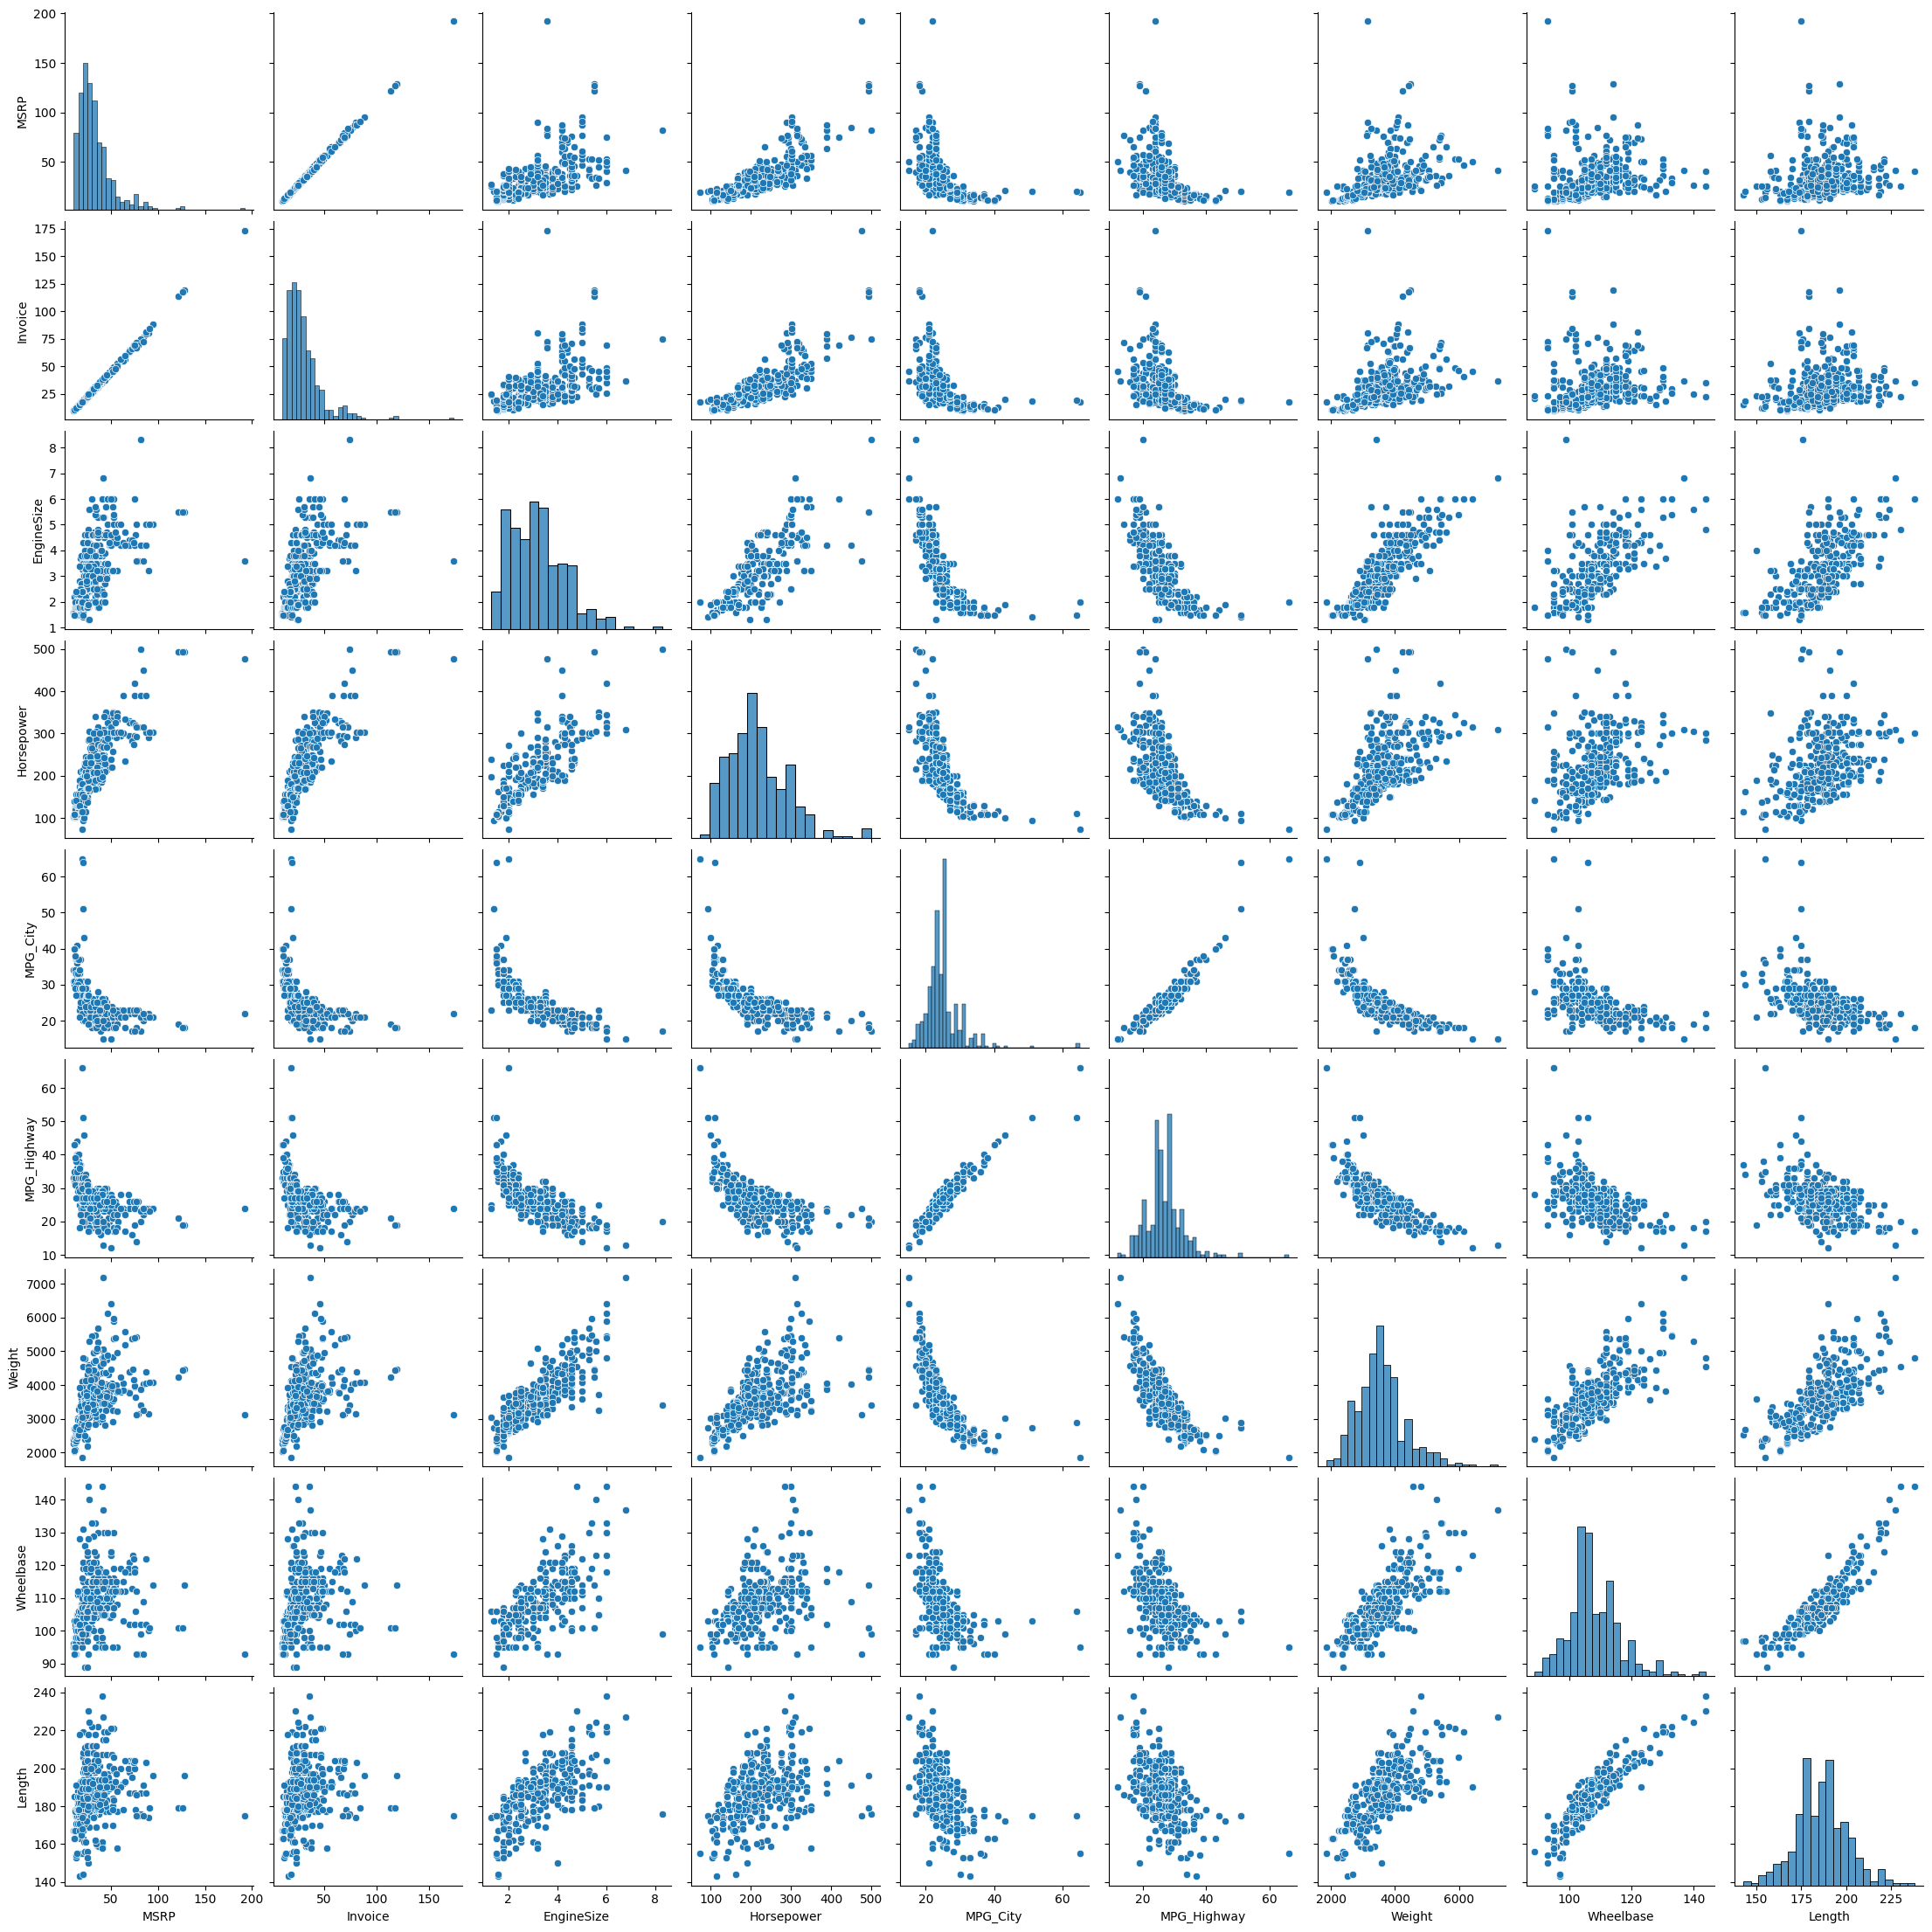

In [261]:
sns.pairplot(data = df)

In [262]:
df['Type'].unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [263]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

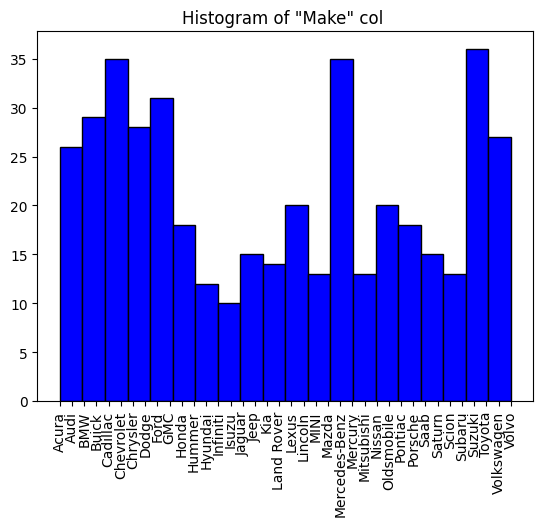

In [264]:
plt.hist(df['Make'], bins=20, color='blue', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Histogram of "Make" col ')
plt.show()

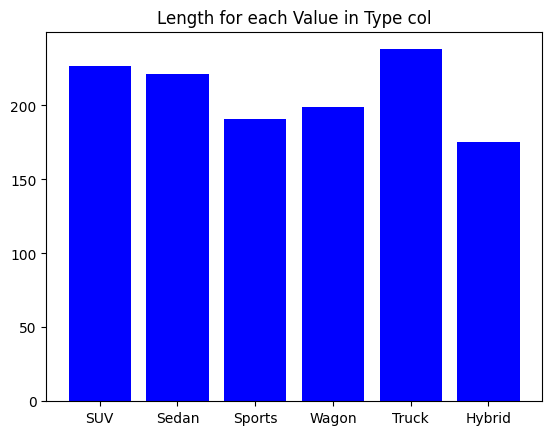

In [265]:
plt.bar(df['Type'],df['Length'],color='blue')
plt.title('Length for each Value in Type col')
plt.show()

In [266]:
df.head()


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36.945,33.337,3.5,6.0,265,22,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23.820,21.761,2.0,4.0,200,29,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26.990,24.647,2.4,4.0,200,27,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33.195,30.299,3.2,6.0,270,25,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43.755,39.014,3.5,6.0,225,23,24,3880,115,197


In [267]:
df['Origin'].value_counts()

Origin
Asia      158
USA       147
Europe    123
Name: count, dtype: int64

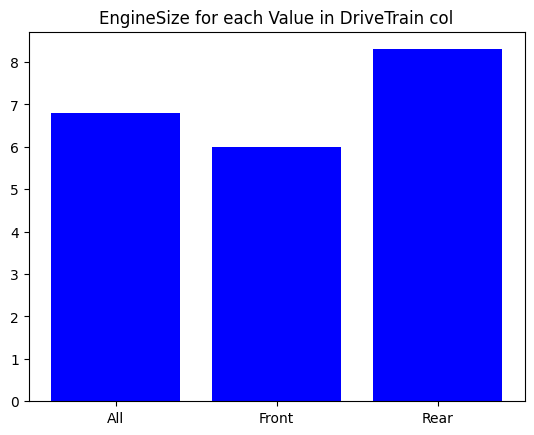

In [268]:
plt.bar(df['DriveTrain'],df['EngineSize'],color='blue')
plt.title('EngineSize for each Value in DriveTrain col')
plt.show()

<h1>________________________________________________________

<h1>Wish you Luck
<h3>Esraa Meslam